# Chapter 3: Details of logistic regression and feature exploration

In [58]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn as sk
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [4]:
data = pd.read_csv('chapter1_cleaned_data.csv', index_col='ID')
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
ID,,,,,,,,,,,,,,,,,,,,,
798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,university,0,0,0,1
8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
85698822-43f5,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
features_response = data.columns.tolist()
remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']
features_response = [item for item in features_response if item not in remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
corr = data[features_response].corr()
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


<AxesSubplot:>

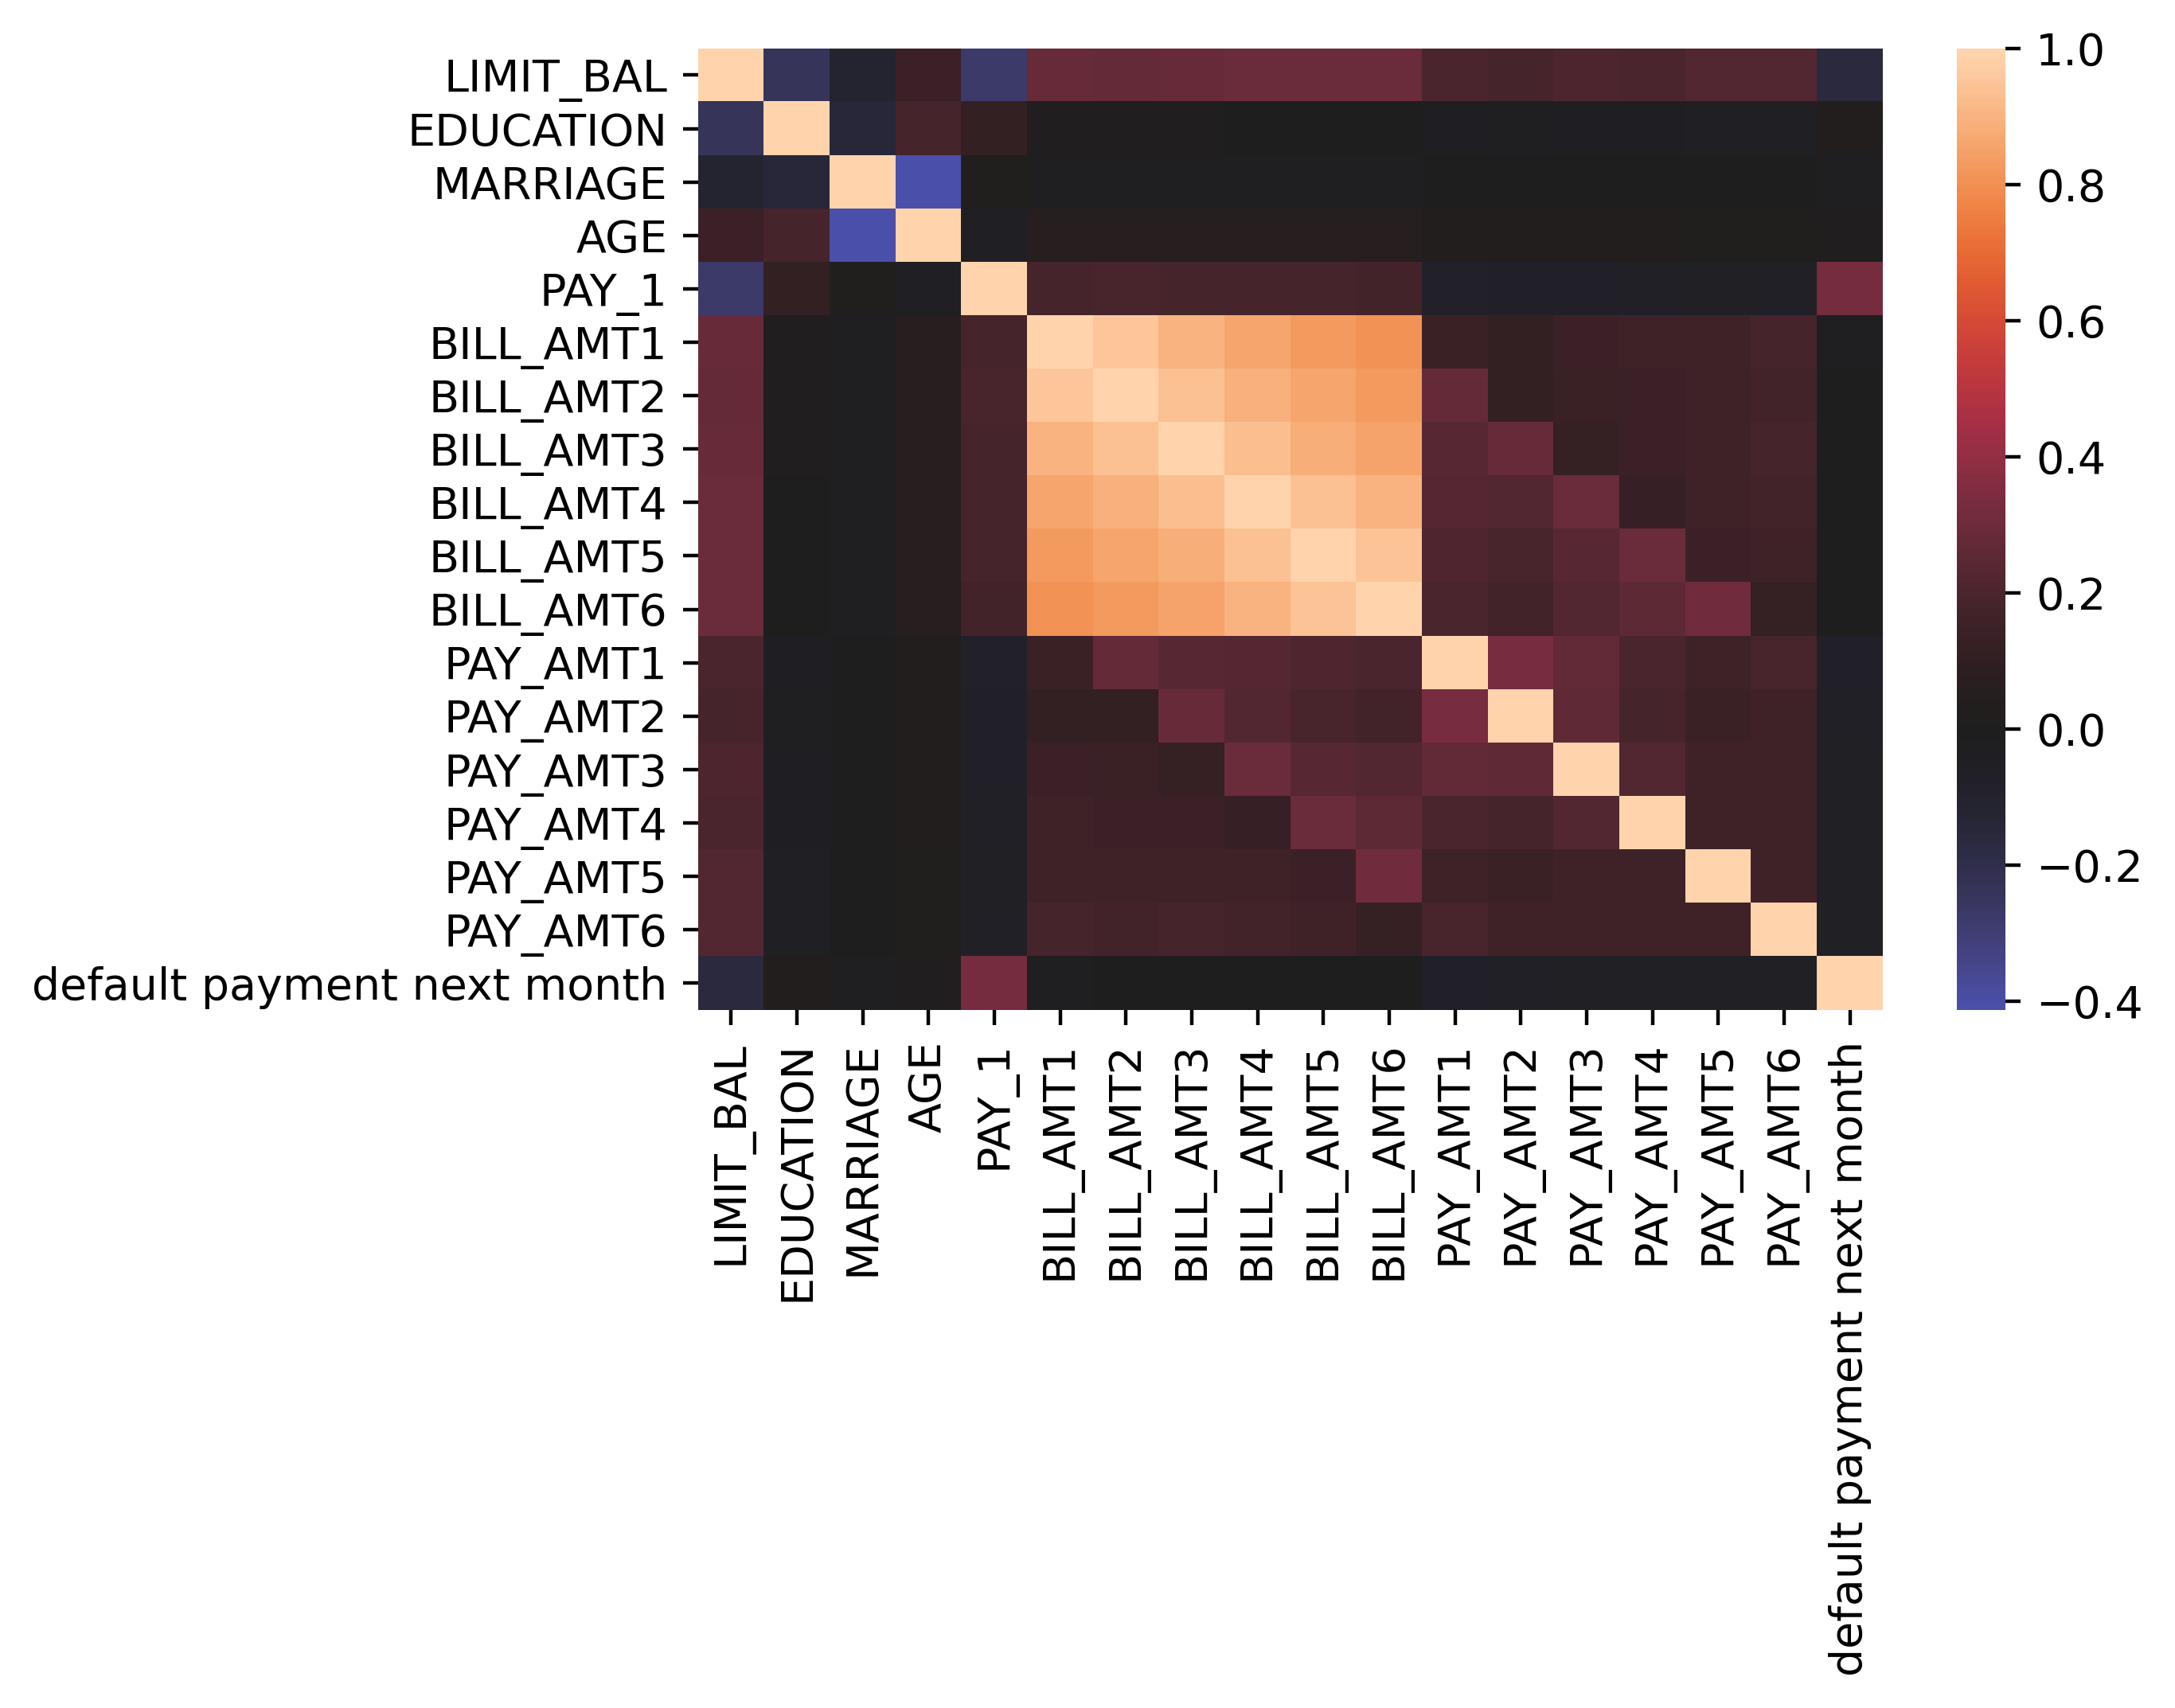

In [7]:
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0)

Exercise 11: F-test and Univariate Feature Selection

In [8]:
X = data[features_response].iloc[:,:-1].values
y = data[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [9]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [10]:
F_test_df = pd.DataFrame({'Feature': features_response[:-1], 'F statistic': f_stat, 'p value': f_p_value})
F_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [11]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [12]:
best_feature_ix = selector.get_support()
features = features_response[:-1]
best_features = [features[counter] for counter in range(len(features))
if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

Exercise 12: Visualizing the Relationship between Features and Response

In [13]:
overall_default_rate = data['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [14]:
group_by_pay_mean_y = data.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


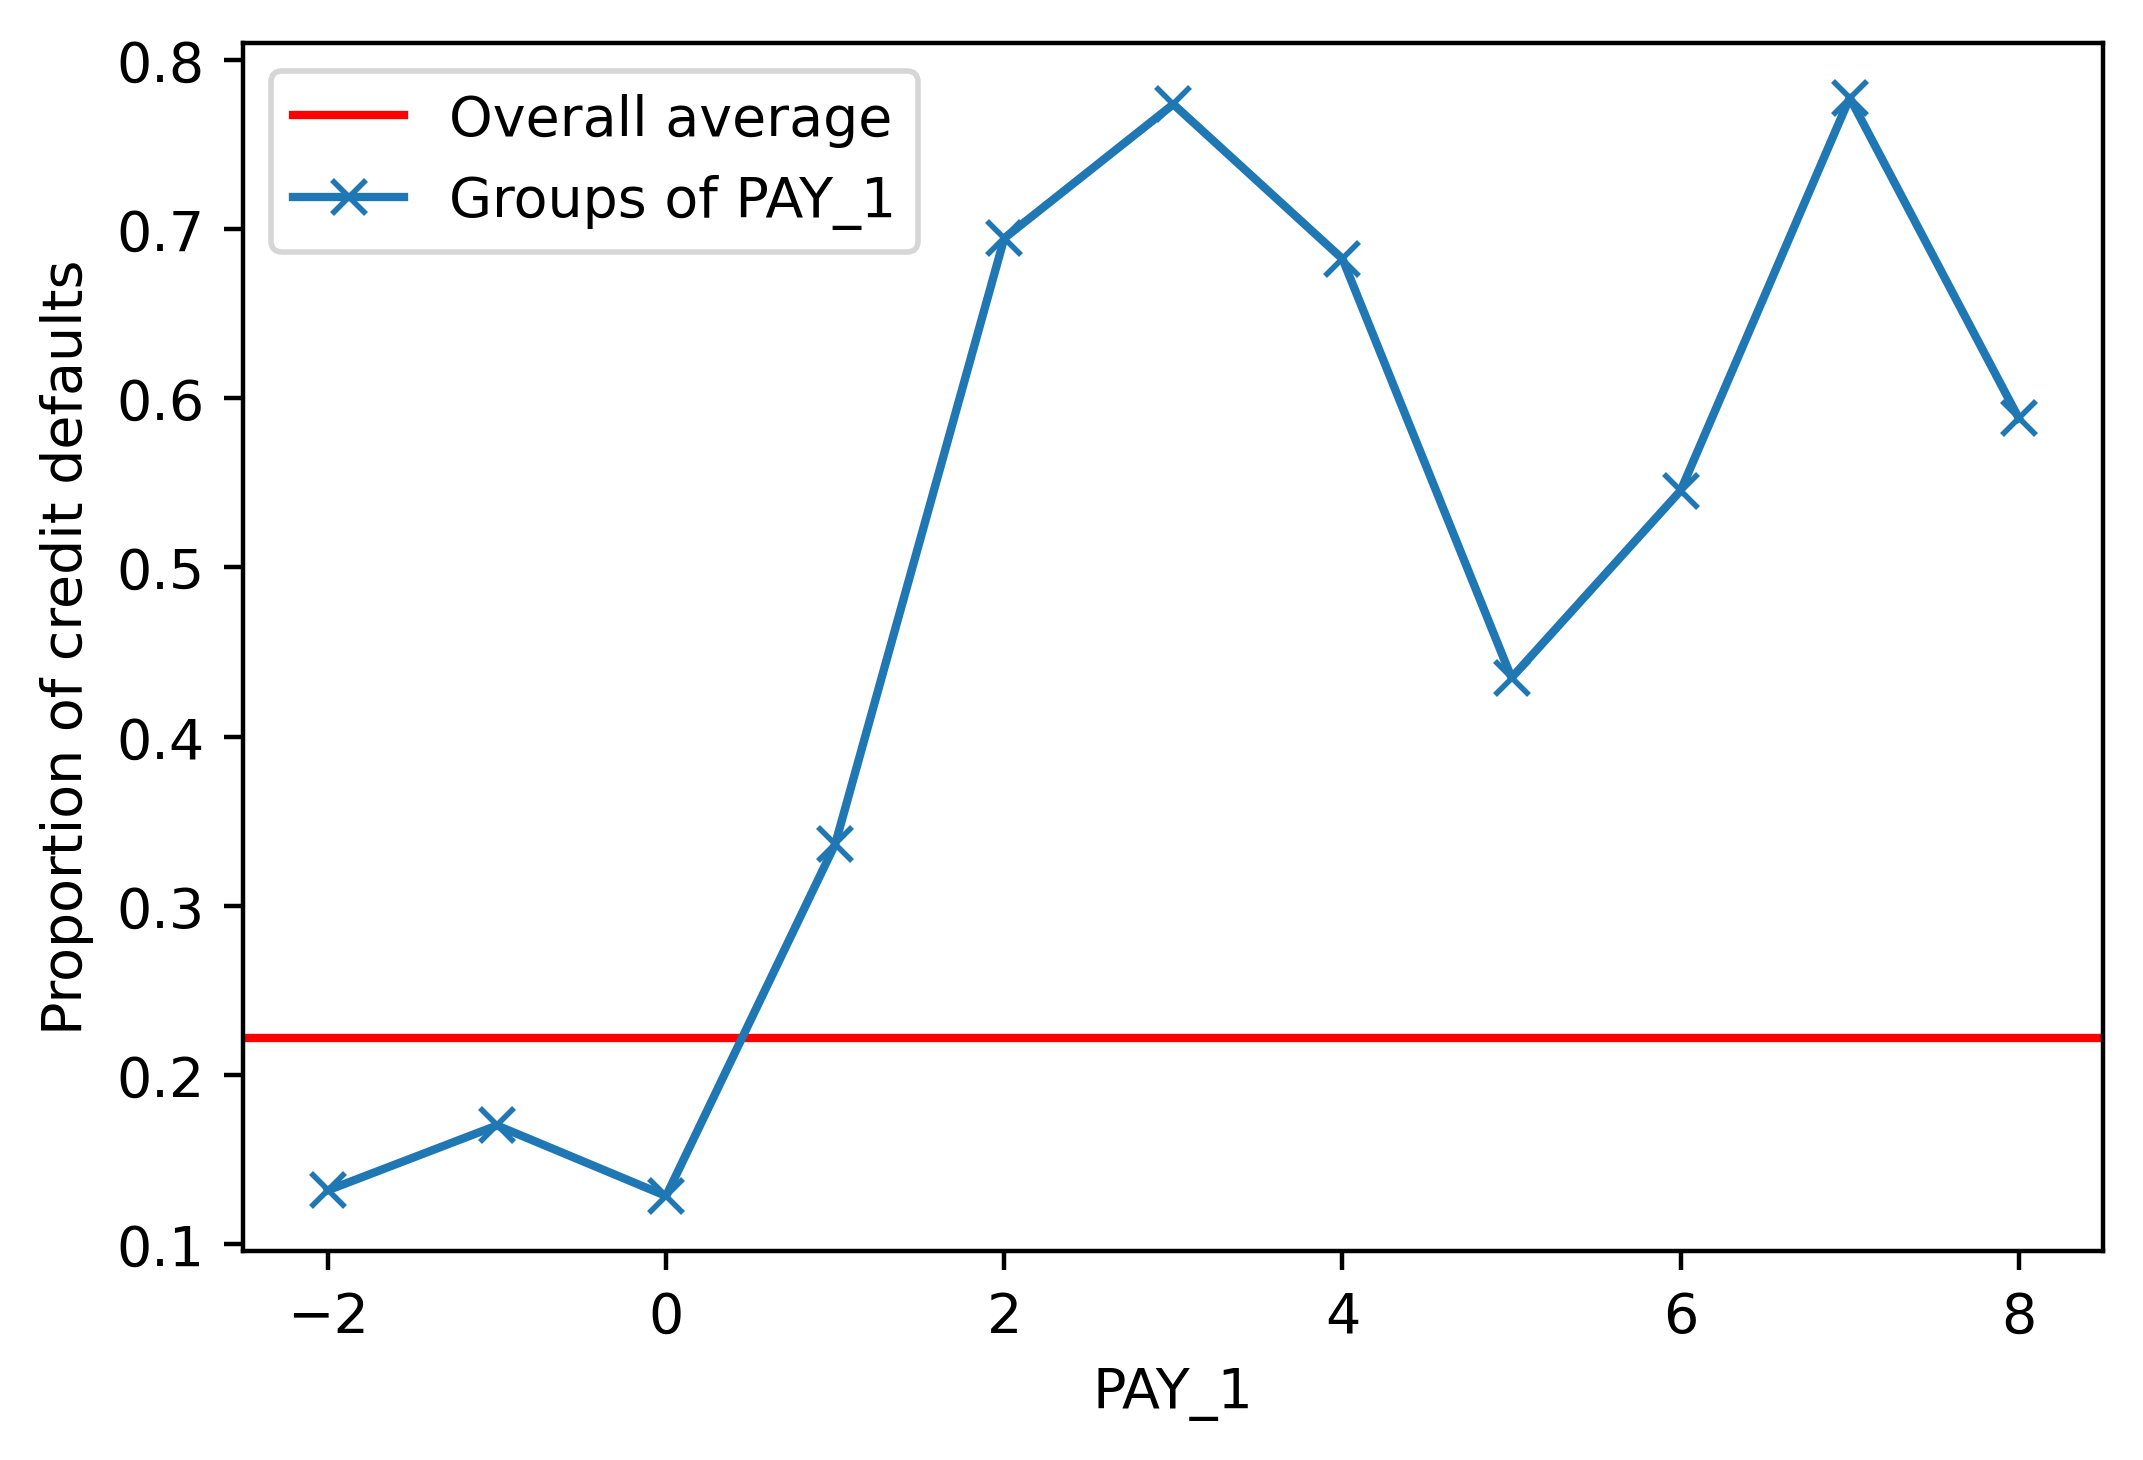

In [15]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Overall average', 'Groups of PAY_1'])

Text(0.5, 1.0, 'Credit limits by response variable')

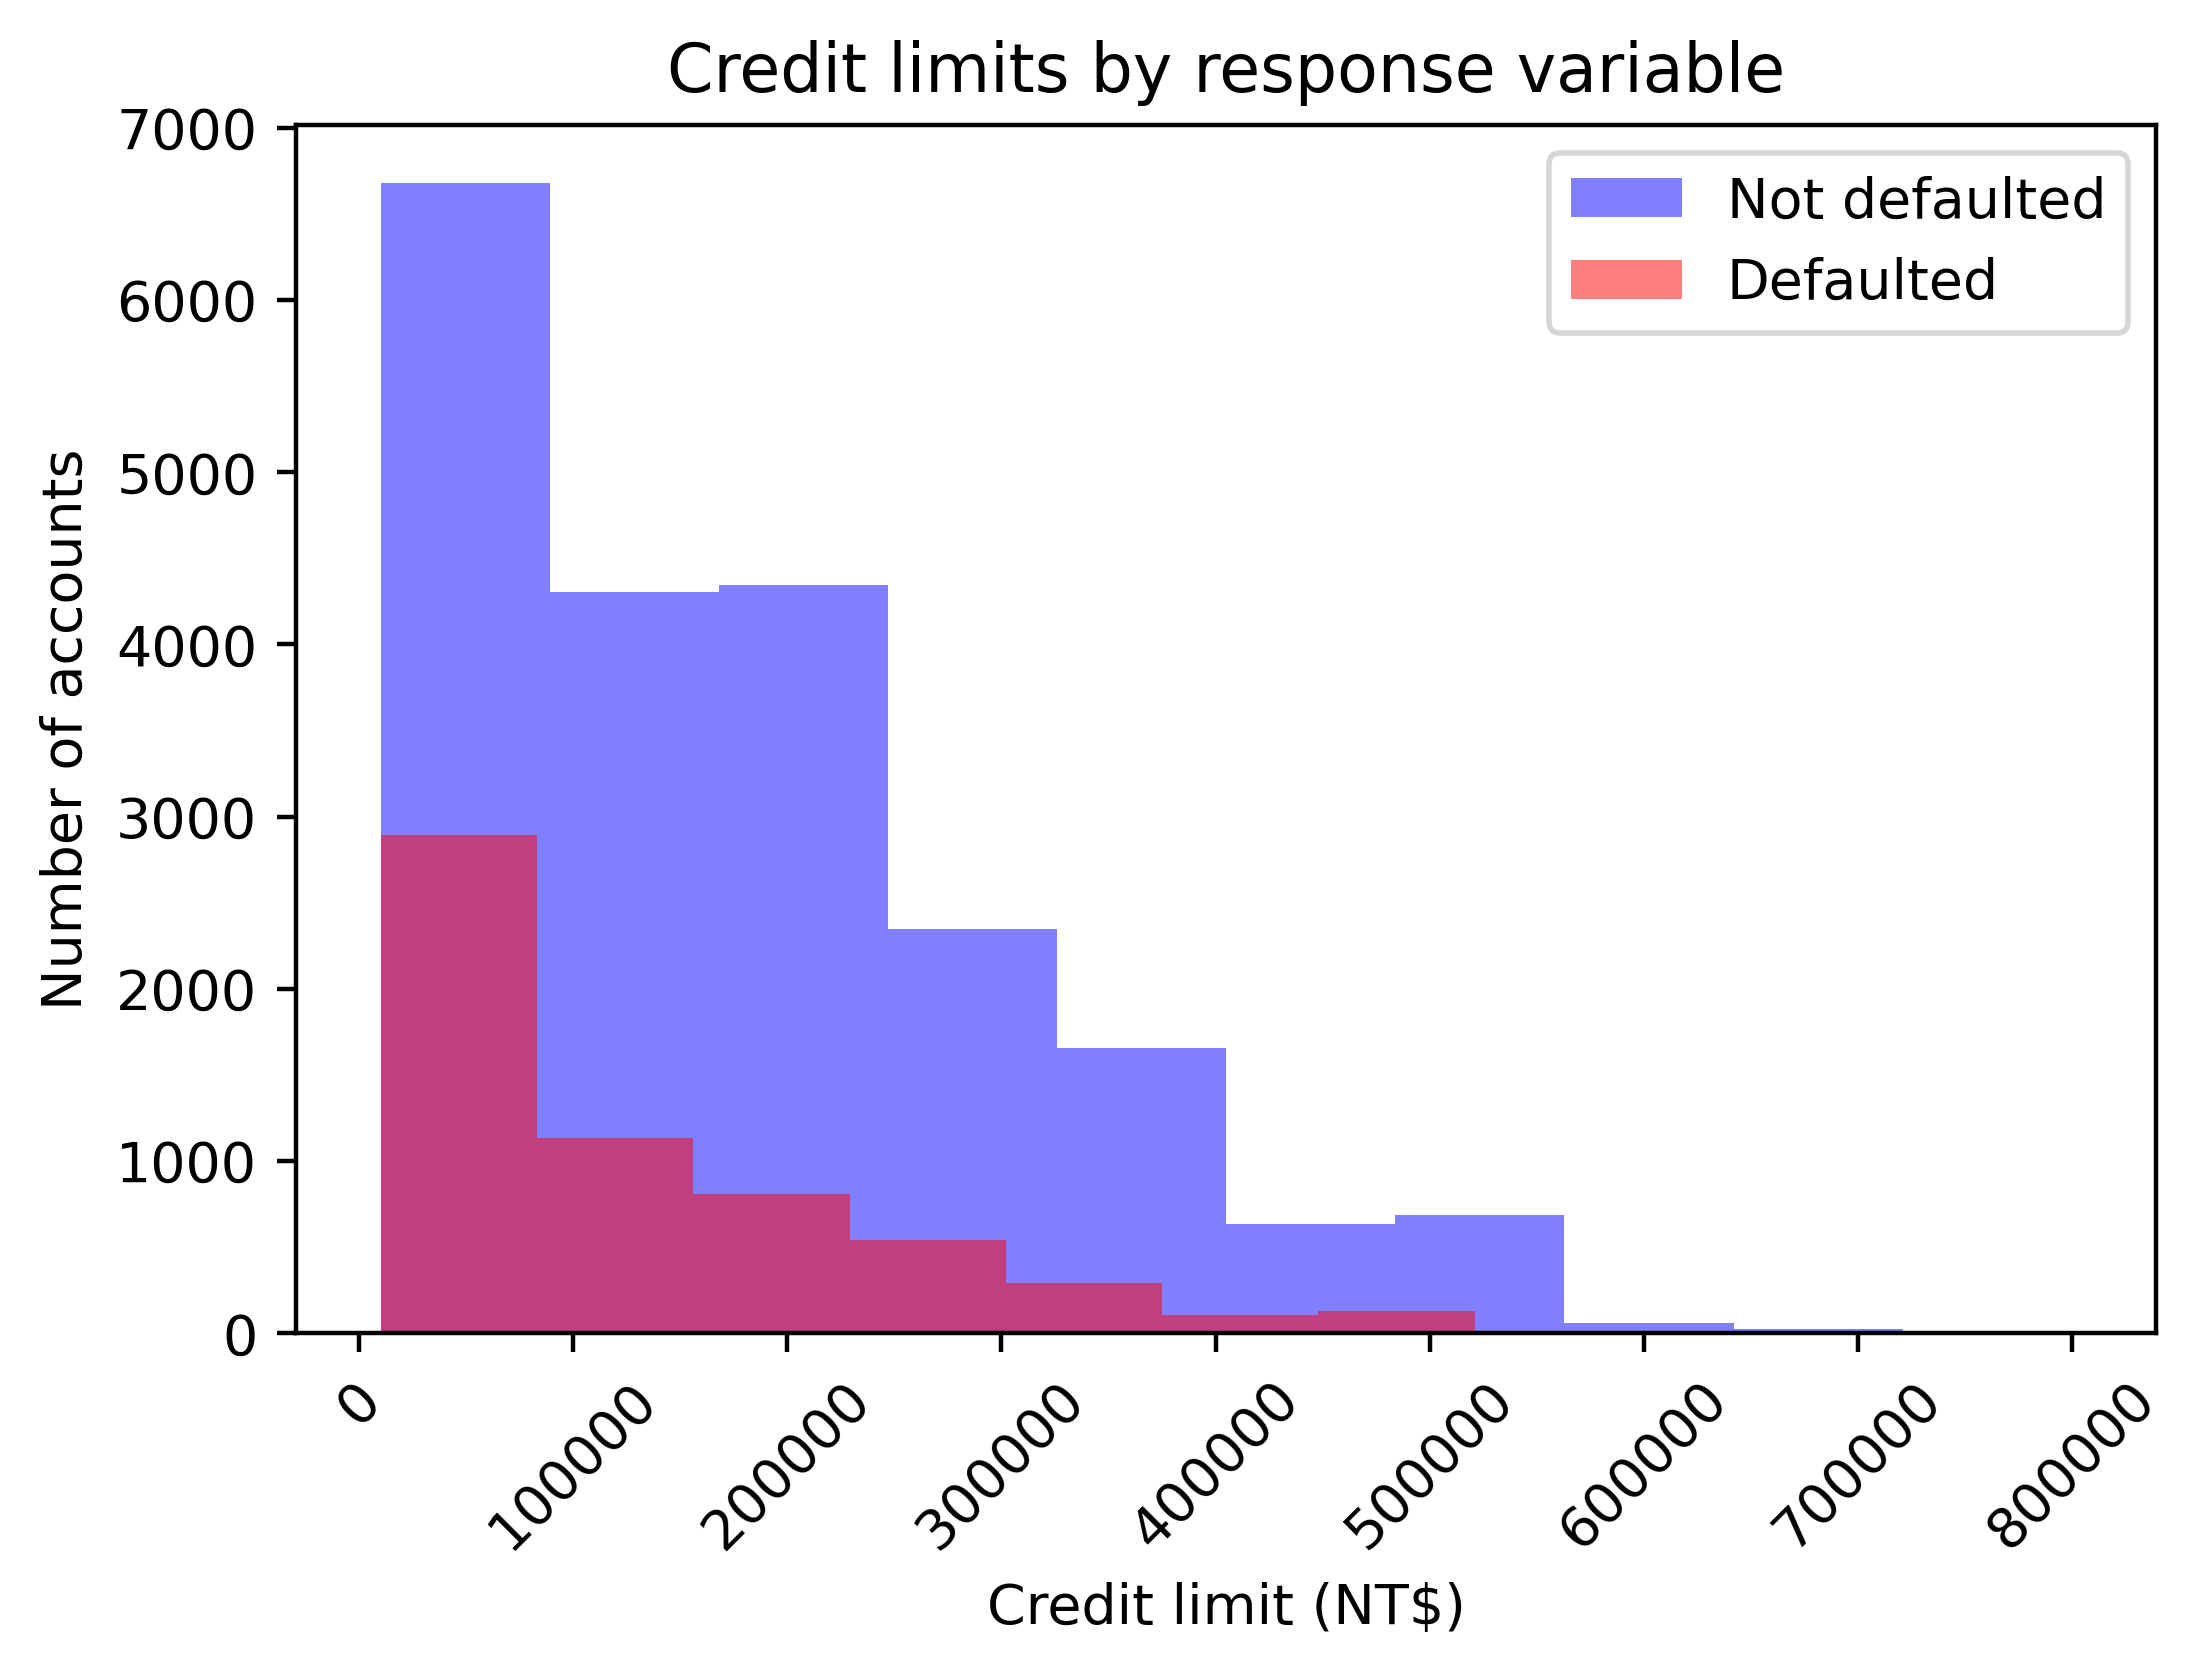

In [16]:
pos_mask = y == 1
neg_mask = y == 0
axes = plt.axes()
axes.hist(data.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(data.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

This is not a good histogram, because it does not make clear the hypothesis related to this feature, and the only information we can take from this graphic, is that most accounts do not default, which can already be shown by the overall average. In order to better compare the two classes, we will normalize them, this way we will be able to extract valuable insight from the shape of the distributions.

800000
C:\Users\Vinicius\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

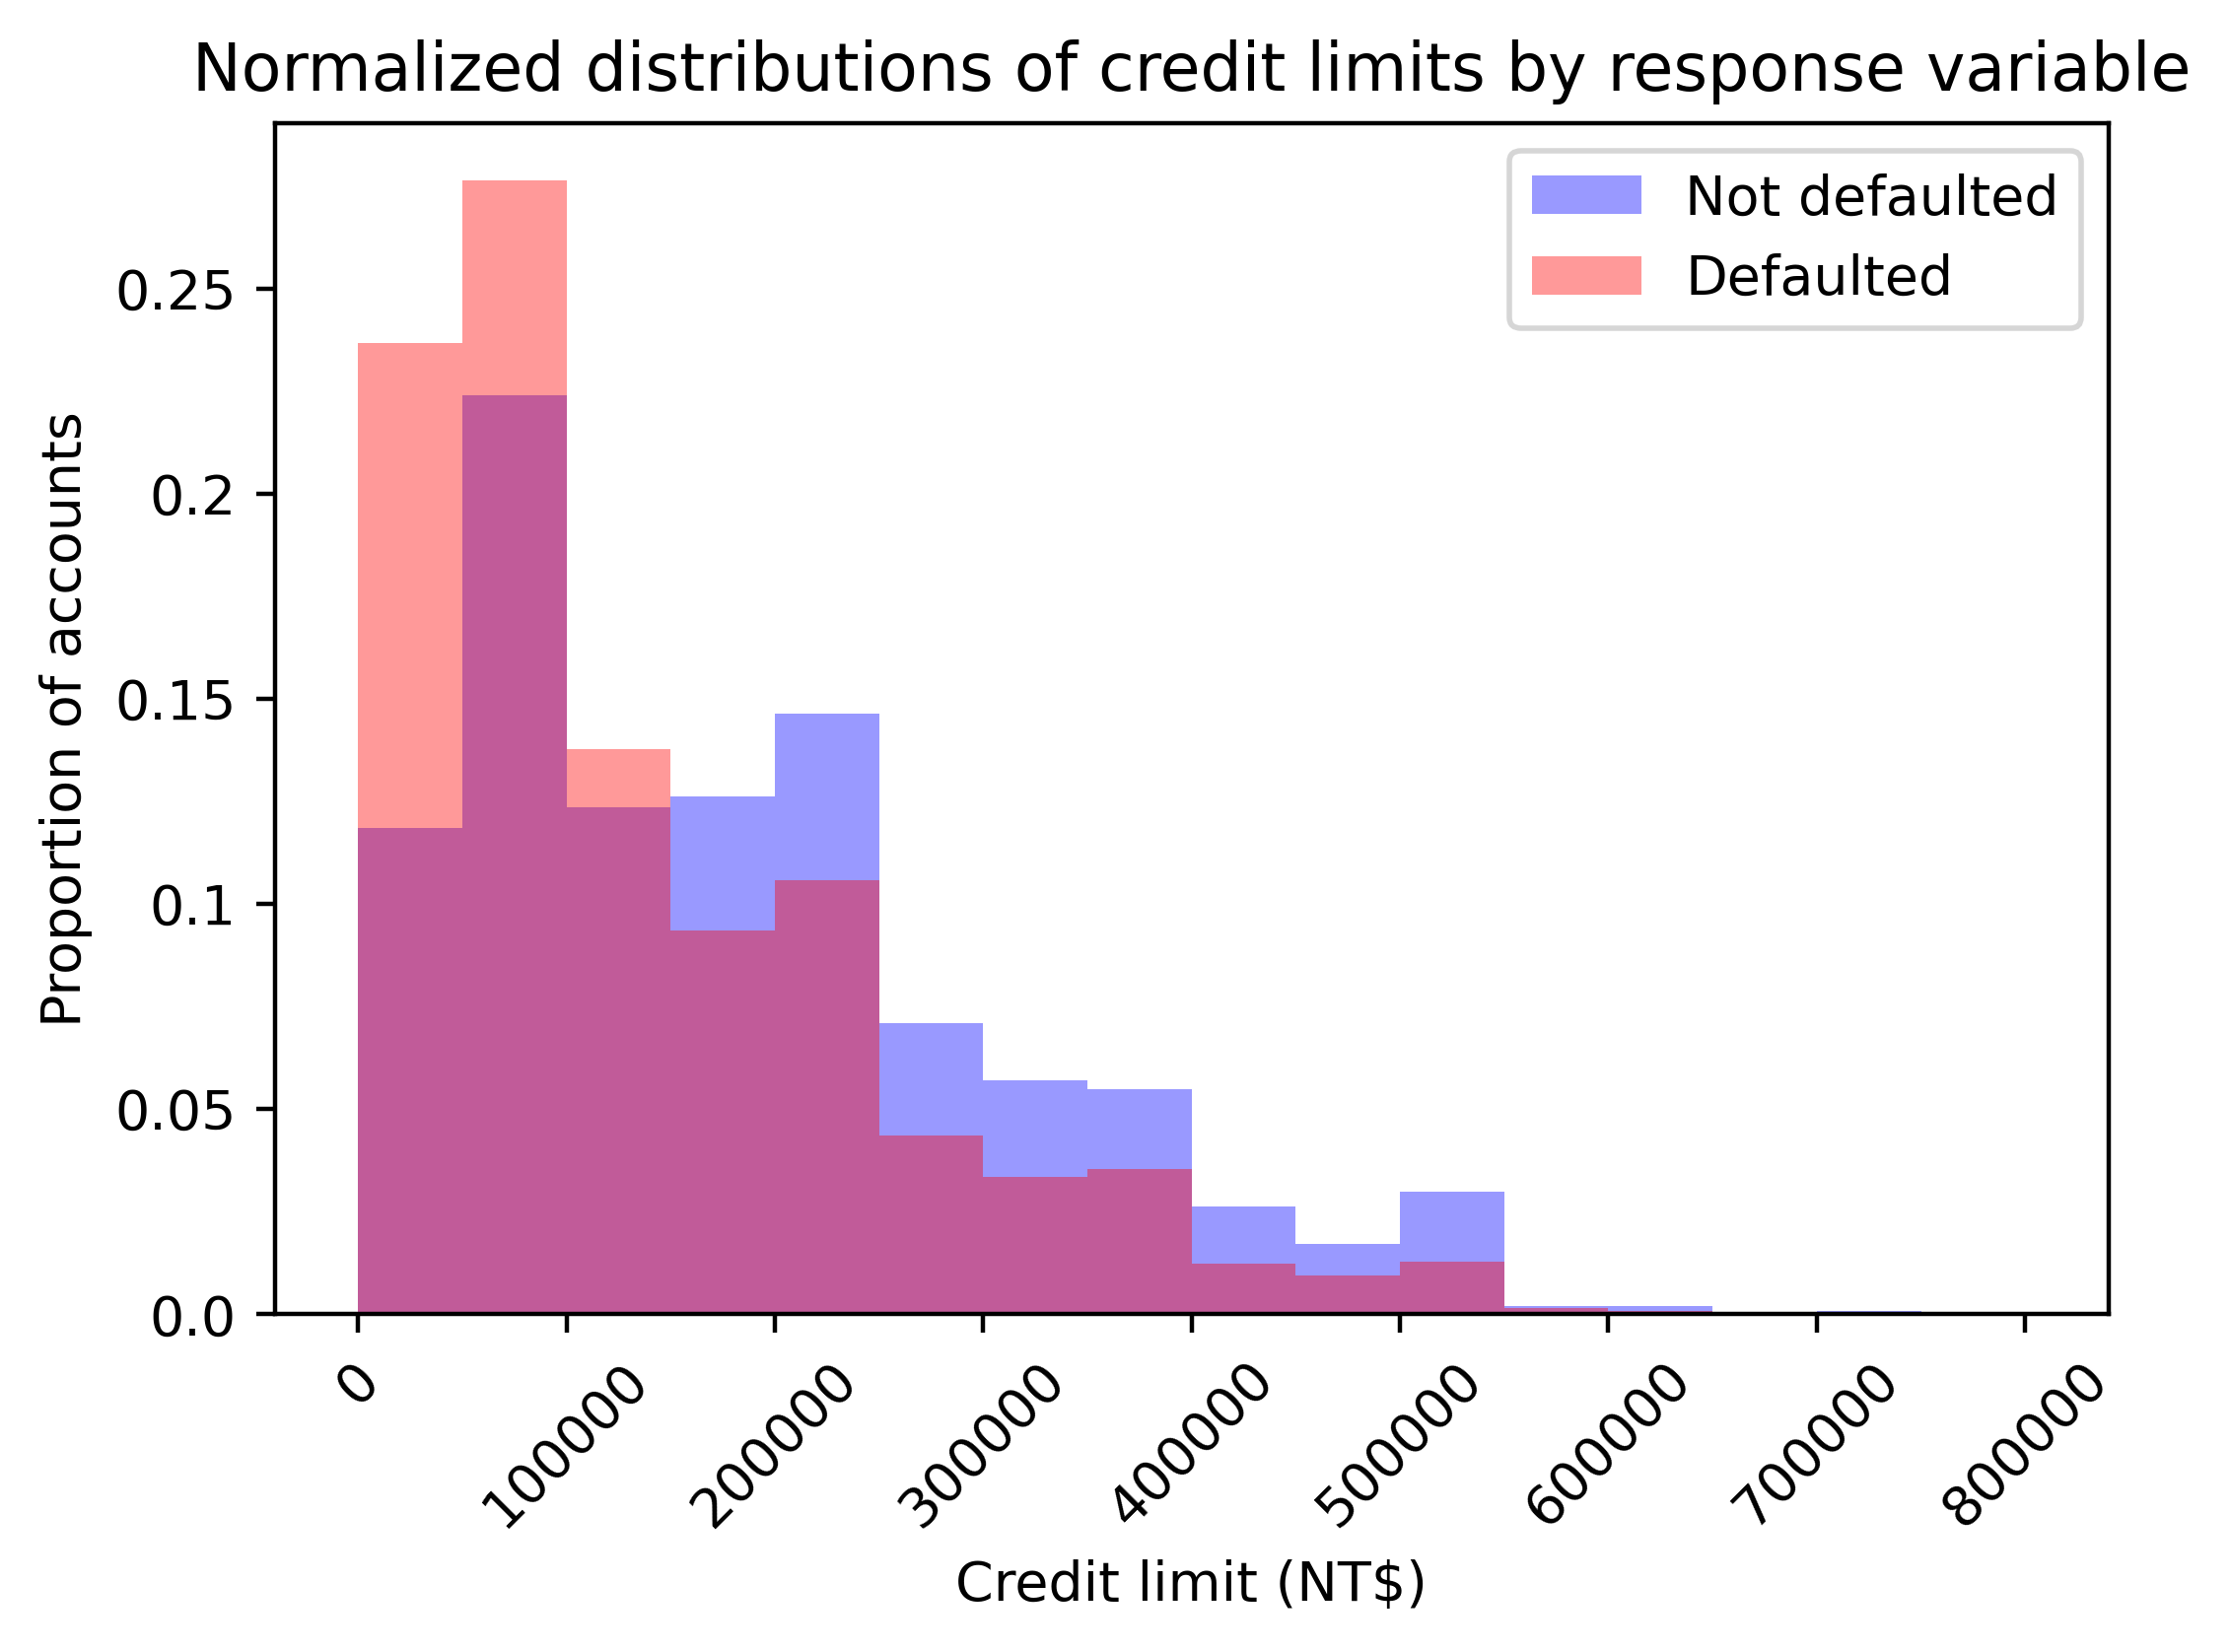

In [17]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])
axes = plt.axes()
axes.hist(data.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.4, density=True, color='blue')
axes.hist(data.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.4, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

Exercise 15: Linear Decision Boundary of Logistic Regression

In [21]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


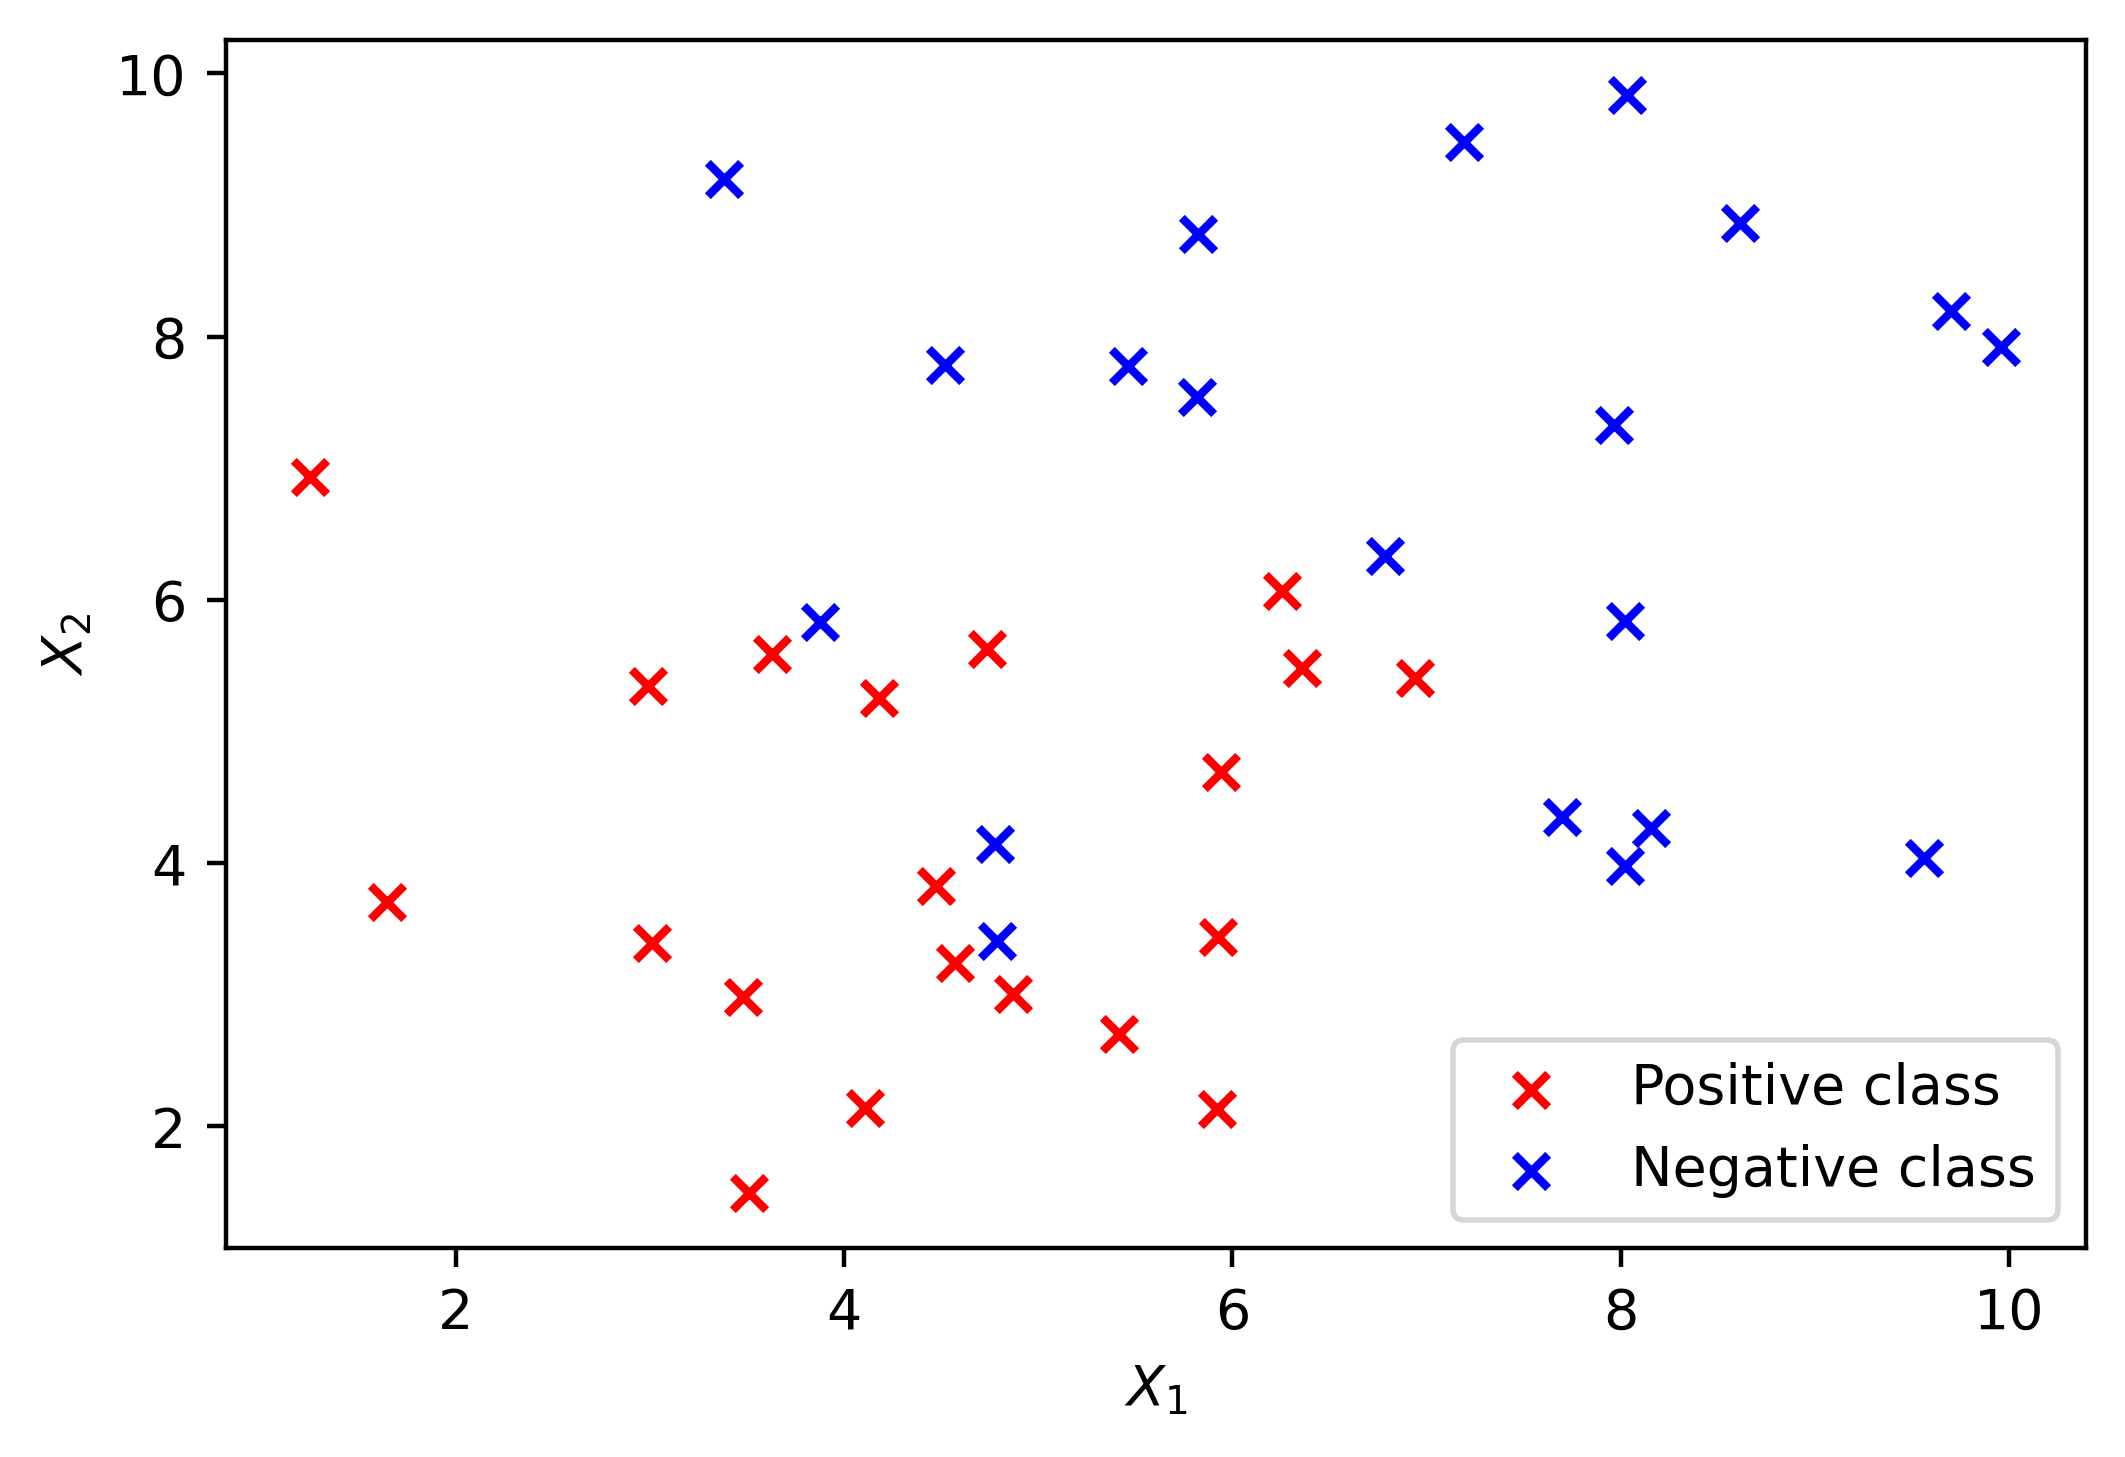

In [22]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [23]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [24]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [26]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver='liblinear')
example_lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [28]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

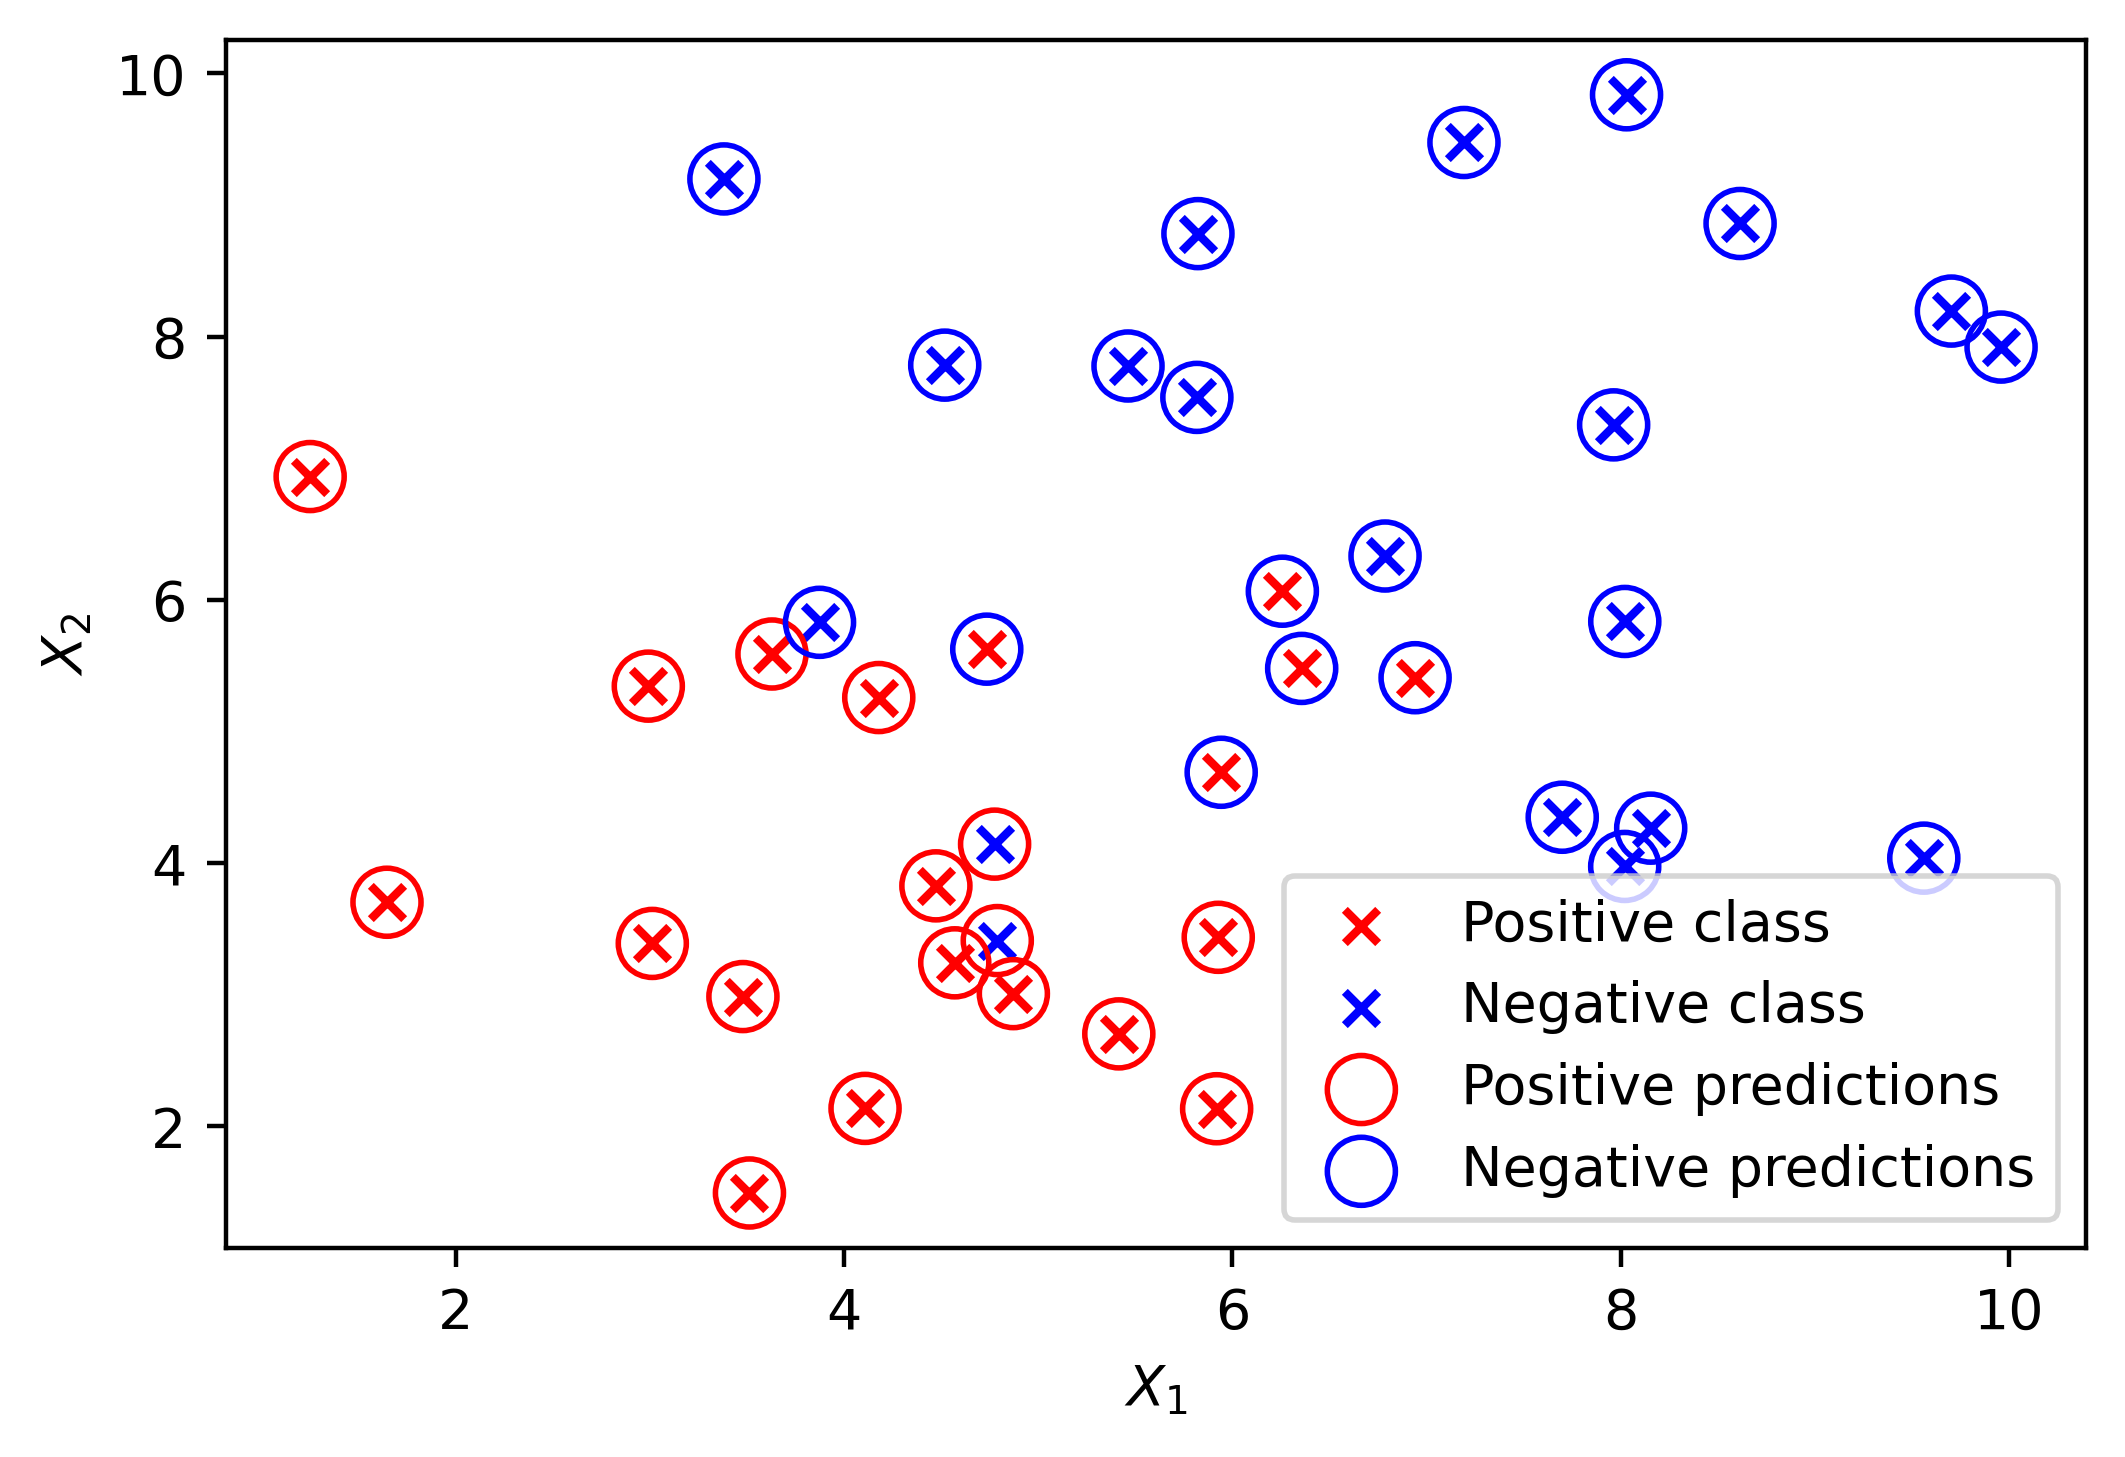

In [29]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150,
marker='o',
edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150,
marker='o',
edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions',
'Negative predictions'])

In [30]:
theta_0 = example_lr.intercept_
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]

-0.20245058016285838 -0.25336423626773225


In [33]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

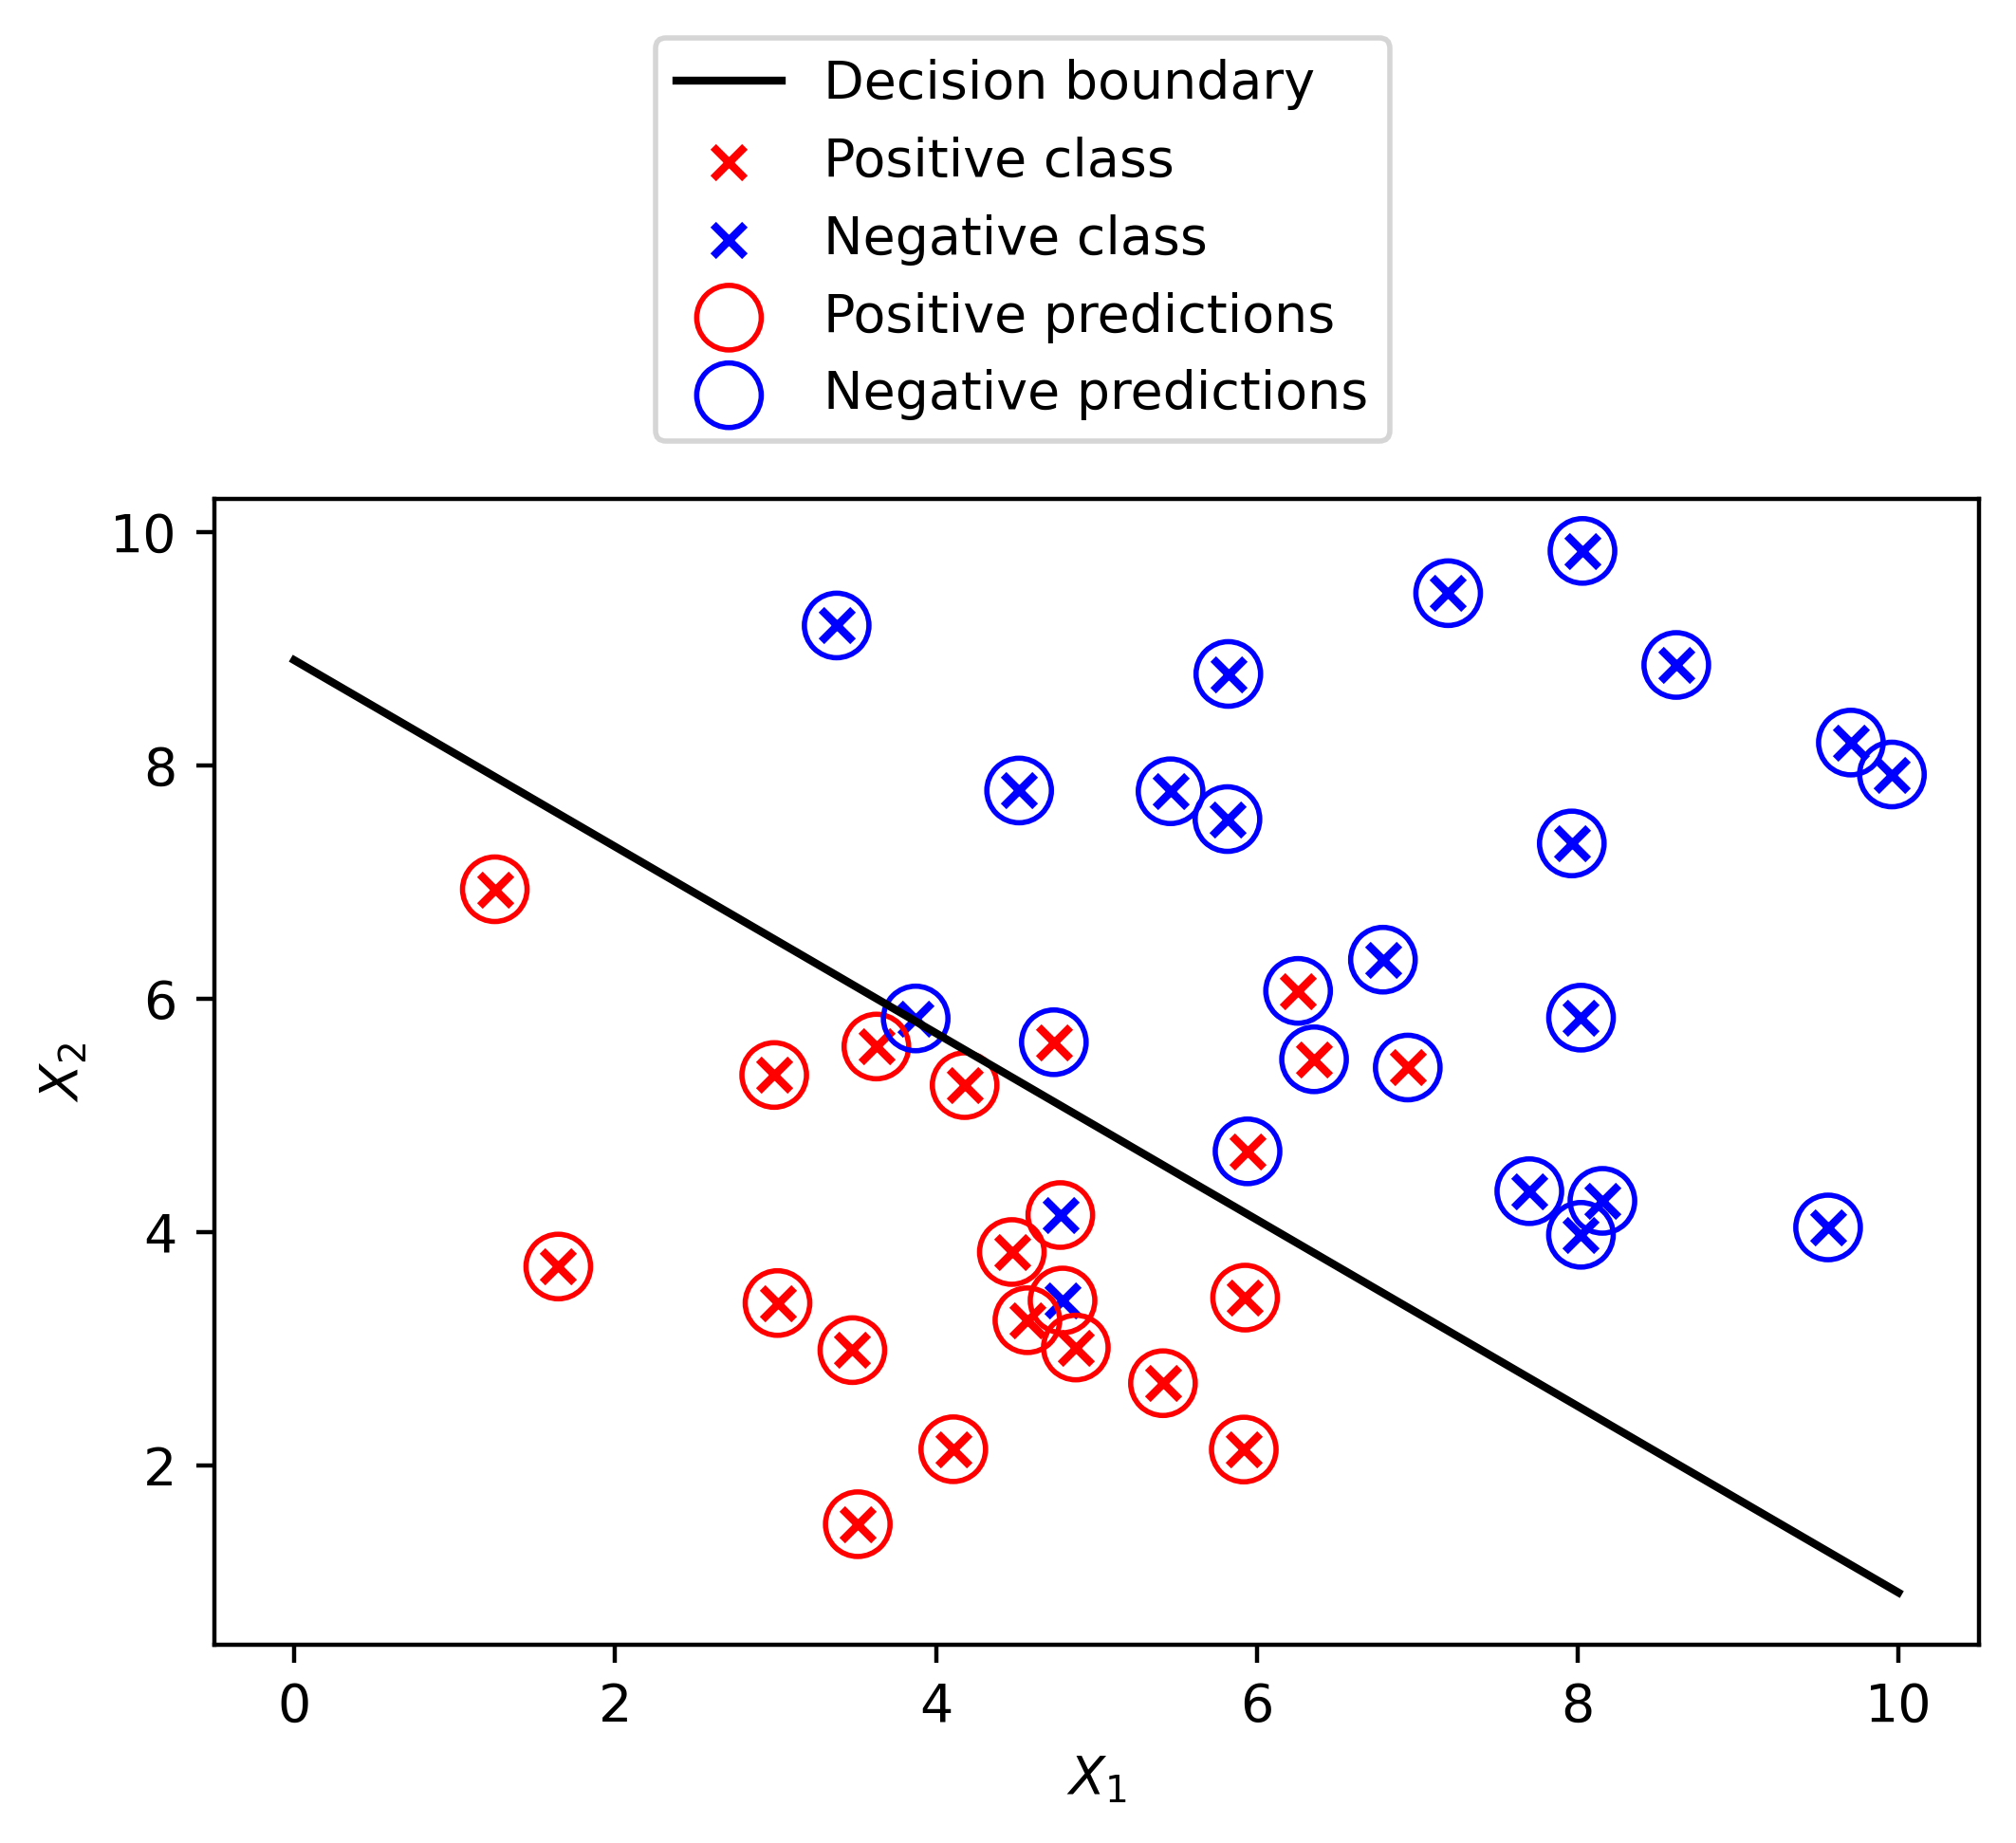

In [35]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1],s=150, marker='o', edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-',label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

# Activity 3: Fitting a Logistic Regression Model and Directly Using the Coefficients

In [141]:
PAY_1 = data['PAY_1'].values.reshape(-1,1)
LIMIT_BAL = data['PAY_1'].values.reshape(-1,1)
X = np.hstack((PAY_1,LIMIT_BAL))
y = data['default payment next month'].values

In [142]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [143]:
log_reg = sk.linear_model.LogisticRegression()
log_reg.solver = 'liblinear'
log_reg

LogisticRegression(solver='liblinear')

In [144]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [145]:
y_predict = log_reg.predict(X_test)
pred_probs = log_reg.predict_proba(X_test)

In [146]:
theta_0 = log_reg.intercept_[0]
theta_1 = log_reg.coef_[0][0]
theta_2 = log_reg.coef_[0][1]
thetas = np.array([theta_1, theta_2, theta_0,]).reshape(3,1)

In [147]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_test,ones))

In [150]:
X_sig = X_test @ thetas
p = 1/(1+np.exp(-X_sig))
y_pred_man = (p >= 0.5).astype(int).reshape(1,-1)

In [152]:
pred_compare = y_predict == y_pred_man
u, u_index, u_count = np.unique(pred_compare, return_index = True, return_counts = True)
print(u)
print (u_count)

[ True]
[5333]


In [158]:
roc_auc_sklearn = sk.metrics.roc_auc_score(y_test, pred_probs[:,1])
roc_auc_manual = sk.metrics.roc_auc_score(y_test, p)
print(roc_auc_sklearn)
print(roc_auc_manual)

0.6853775357674106
0.6853775357674106
